# Assignment 26-06-20

# CSE-221710305032-M.Sai Srininvas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.shape

(200, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [7]:
df.nunique()

TV           190
radio        167
newspaper    172
sales        121
dtype: int64

In [8]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


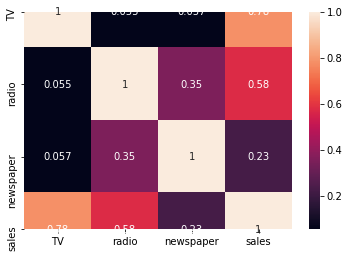

In [10]:
sns.heatmap(df.corr(),annot=True)

TV and Radio has lot of effect on Sales

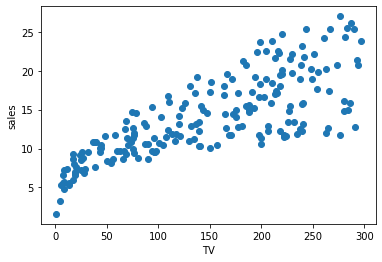

In [11]:
plt.xlabel("TV")
plt.ylabel("sales")
plt.scatter(df.TV,df.sales)

As the Advertisements on TV increases Sales also increased
<br>TV shows a positive impact on sales

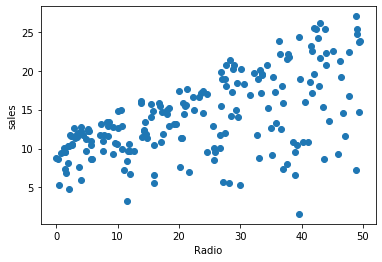

In [12]:
plt.xlabel("Radio")
plt.ylabel("sales")
plt.scatter(df.radio,df.sales)

As the Advertisements on Radio increases Sales also increased
<br>Radio also shows a positive impact on Sales but not as much as TV

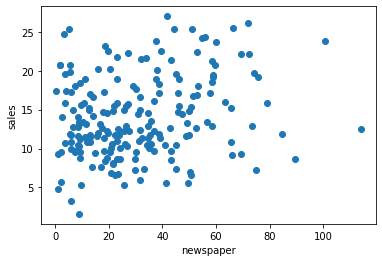

In [13]:
plt.xlabel("newspaper")
plt.ylabel("sales")
plt.scatter(df.newspaper,df.sales)

As the Advertisements on Newspaper increases Sales also increased
<br>Newspaper shows a positive impact on Sales but not as much as Radio
<br>Newspaper doesn't really show a clear impact

In [14]:
df[df.duplicated()]

,TV,radio,newspaper,sales


In [15]:
x=df.drop("sales",axis=1)
x

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [16]:
y=df[['sales']]
y

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [19]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160, 1)
(40, 1)


In [20]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
y_pred=lr.predict(x_test)

In [22]:
y_pred==y_test

,sales
112,False
29,False
182,False
199,False
193,False
85,False
10,False
54,False
115,False
35,False


In [23]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import math

In [24]:
print("r2_score:",r2_score(y_test,y_pred))
print("adjusted r2_score:",1- (1-r2_score(y_test, y_pred))*(len(x_test)-1)/
                                  (len(x_test)-x_test.shape[1]-1))
print("mean_absolute_error:",mean_absolute_error(y_test,y_pred))
print("mean_squared_error:",mean_squared_error(y_test,y_pred))
print("root_mean_squared_error:",math.sqrt(mean_squared_error(y_test,y_pred)))

r2_score: 0.8000778481129651
adjusted r2_score: 0.7834176687890455
mean_absolute_error: 1.5057905368435538
mean_squared_error: 3.713842608908459
root_mean_squared_error: 1.927133261844769
